# **Roubos, Furtos e Crimes contra a vida no Rio de Janeiro: Uma Análise**

Já é de senso comum considerar Rio de Janeiro como uma cidade perigosa, no entanto ela não se encontra nem entre as 10 cidades brasileiras mais violentas (**[Atlas da Violência 2019 por municípios](https://infograficos.gazetadopovo.com.br/seguranca-publica/atlas-da-violencia-2019-por-municipios/https://infograficos.gazetadopovo.com.br/seguranca-publica/atlas-da-violencia-2019-por-municipios/)**). Sendo assim, nesse projeto será feito uma análise da violência no Rio de Janeiro para tentarmos entender melhor o motivo da cidade passar essa sensação de insegurança para as pessoas.

## **Obtenção dos Dados**

Os dados que serão utilizados na análise foram obtidos no portal [ISPDados](http://www.ispdados.rj.gov.br/), onde o Instituto de Segurança Pública do Rio de Janeiro disponibiliza dados de forma aberta.
De acordo com informações do portal ISPDados:
> As estatísticas aqui divulgadas são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro (SEPM). Antes de serem consolidados no ISP, os RO são submetidos ao controle de qualidade realizado pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil.

O *dataset* utilizado nesse projeto está disponível neste [link](https://raw.githubusercontent.com/dinopolo/Datasets/master/vio_rj.csv) e o dicionário dos atributos pode ser visto neste [link](http://www.ispdados.rj.gov.br/Arquivos/DicionarioVariaveisDOMensalEstadoDesde1991.xlsx).

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/dinopolo/Datasets/master/vio_rj.csv")

C:\Users\Dino\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Análise exploratória dos dados**

Nesta seção, será realizado uma análise inicial exploratória para compreendermos melhor o conjunto de dados utilizado. Será verificado:
1. O tamanho do conjunto de dados;
2. O nome dos atributos (colunas) e os seus tipos;
3. As 5 primeiras entradas do conjunto de dados;
4. A porcentagem de valores ausentes em cada coluna. 

**Tamanho do conjunto de dados**

In [2]:
# Quantidade de atributos e linhas
print("Atributos:\t {}".format(df.shape[1]))
print("Entradas:\t {}".format(df.shape[0]))

Atributos:	 56
Entradas:	 344


**Nome e tipo dos atributos**

In [3]:
# Nome e tipo dos atributos
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

**As 5 primeiras entradas do conjunto de dados**

In [4]:
# 5 primeiras entradas
pd.set_option('display.max_columns', None)
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


**Porcentagem de valores ausentes**

In [5]:
# Valores ausentes
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


Assim, para esta análise iremos focar apenas em roubos, furtos e homicídios, portanto os atributos utilizados serão:
- `roubo_bicicleta`;
- `furto_bicicleta`;
- `furto_coletivo`;
- `furto_celular`;
- `roubo_apos_saque`;
- `roubo_conducao_saque`;
- `roubo_cx_eletronico`;
- `roubo_celular`;
- `lesao_corp_morte`;
- `hom_culposo`;
- `roubo_comercio`;
- `roubo_residencia`;
- `latrocinio`;
- `hom_doloso`;
- `roubo_transeunte`;
- `mes`;
- `roubo_veiculo`;
- `roubo_carga`;
- `roubo_em_coletivo`;
- `roubo_banco`;
- `outros_roubos`;
- `total_roubos`;
- `furto_veiculos`;
- `furto_transeunte`;
- `outros_furtos`;
- `total_furtos`;
- `recuperacao_veiculos`;
- `vano`.

In [6]:
atrs = ['roubo_bicicleta', 'furto_bicicleta', 'furto_coletivo', 'furto_celular', 'roubo_apos_saque', 'roubo_conducao_saque', 'roubo_cx_eletronico', 'roubo_celular', 'lesao_corp_morte', 
        'hom_culposo', 'roubo_comercio', 'roubo_residencia', 'latrocinio', 'hom_doloso', 'roubo_transeunte', 'mes', 'roubo_veiculo', 'roubo_carga', 'roubo_em_coletivo', 'roubo_banco', 
        'outros_roubos', 'total_roubos', 'furto_veiculos', 'furto_transeunte', 'outros_furtos', 'total_furtos', 'recuperacao_veiculos', 'vano']

df_sel = df[atrs]

**Porcentagem dos valores ausentes para o conjunto de dados com atributos selecionados**

In [7]:
((df_sel.isnull().sum() / df_sel.shape[0])*100).sort_values(ascending=False)

roubo_bicicleta         80.232558
furto_bicicleta         80.232558
furto_coletivo          41.860465
furto_celular           41.860465
roubo_apos_saque        41.860465
roubo_conducao_saque    41.860465
roubo_cx_eletronico     41.860465
roubo_celular           31.395349
lesao_corp_morte        27.906977
hom_culposo             24.418605
recuperacao_veiculos     0.000000
roubo_comercio           0.000000
roubo_residencia         0.000000
latrocinio               0.000000
vano                     0.000000
roubo_transeunte         0.000000
mes                      0.000000
roubo_veiculo            0.000000
roubo_carga              0.000000
roubo_em_coletivo        0.000000
roubo_banco              0.000000
outros_roubos            0.000000
total_roubos             0.000000
furto_veiculos           0.000000
furto_transeunte         0.000000
outros_furtos            0.000000
total_furtos             0.000000
hom_doloso               0.000000
dtype: float64

Também faremos um mapa de calor para uma melhor visualização dos valores ausentes:

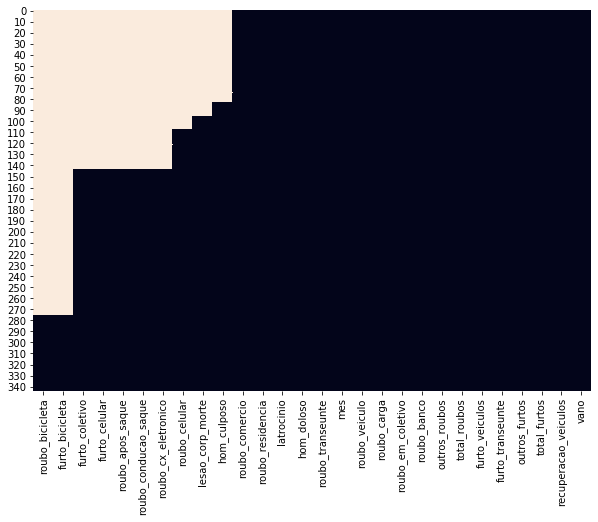

In [8]:
# Mapa de calor dos valores ausentes
plt.figure(figsize=(10,7))
sns.heatmap(df_sel.isnull(), cbar=False);

Com isso, percebemos que os atributos `roubo_bicicleta`, `furto_bicicleta`, `furto_coletivo`, `furto_celular`, `roubo_apos_saque`, `roubo_conducao_saque`, `roubo_cx_eletronico`, `roubo_celular`, `lesao_corp_morte` e `hom_culposo` apresentam valores ausentes.

**Tratamento dos atributos com valores ausentes**

No portal [ISPDados](http://www.ispdados.rj.gov.br/) é citado que alguns atributos começaram a ter seus dados coletados a partir de determinada data, com isso iremos trabalhar apenas a partir da data que houver dados coletados para os atributos: `roubo_bicicleta`, `furto_bicicleta`, `furto_coletivo`, `furto_celular`, `roubo_apos_saque`, `roubo_conducao_saque`, `roubo_cx_eletronico`, `roubo_celular`, `lesao_corp_morte` e `hom_culposo`.

**Histogramas dos atributos selecionados**

Iremos plotar os histogramas do atributos selecionados, com exceção dos atributos `mes` e `vano`.

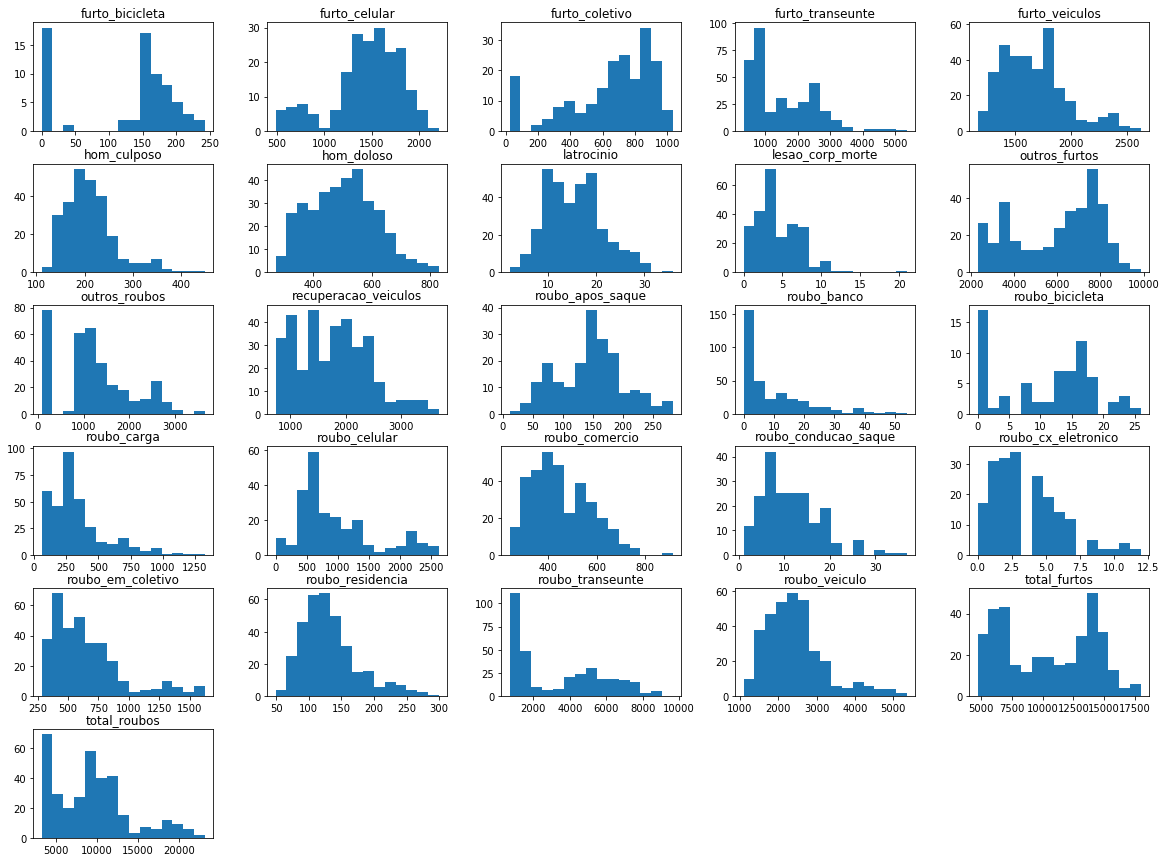

In [9]:
# Plotando os histogramas
df_sel[['roubo_bicicleta', 'furto_bicicleta', 'furto_coletivo', 'furto_celular', 'roubo_apos_saque', 'roubo_conducao_saque', 'roubo_cx_eletronico', 'roubo_celular', 'lesao_corp_morte', 
        'hom_culposo', 'roubo_comercio', 'roubo_residencia', 'latrocinio', 'hom_doloso', 'roubo_transeunte', 'roubo_veiculo', 'roubo_carga', 'roubo_em_coletivo', 'roubo_banco', 
        'outros_roubos', 'total_roubos', 'furto_veiculos', 'furto_transeunte', 'outros_furtos', 'total_furtos', 'recuperacao_veiculos']].hist(bins=15, figsize=(20, 15), grid=False);

## **Resumo estatístico dos atributos selecionados**

É muito importante conhecermos as informações estatísticas dos dados que utilizamos, para que possamos compreender melhor os dados. Sendo assim, o resumo estatístico dos atibutos selecionados:

In [10]:
df_sel.describe()

,roubo_bicicleta,furto_bicicleta,furto_coletivo,furto_celular,roubo_apos_saque,roubo_conducao_saque,roubo_cx_eletronico,roubo_celular,lesao_corp_morte,hom_culposo,roubo_comercio,roubo_residencia,latrocinio,hom_doloso,roubo_transeunte,mes,roubo_veiculo,roubo_carga,roubo_em_coletivo,roubo_banco,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,outros_furtos,total_furtos,recuperacao_veiculos,vano
count,68.000000,68.000000,200.000000,200.000000,200.000000,200.000000,200.000000,236.000000,248.000000,260.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,10.808824,124.808824,650.230000,1449.175000,145.665000,11.320000,3.550000,957.974576,4.334677,212.119231,455.005814,133.284884,15.668605,504.555233,3418.520349,6.453488,2448.697674,340.322674,659.002907,9.375000,1211.223837,9428.119186,1674.671512,1518.921512,5994.328488,10433.177326,1772.238372,2004.837209
std,7.767628,80.247427,268.836273,368.638776,55.392367,6.404113,2.634808,624.309034,2.755357,54.234700,119.765076,44.317963,5.861427,113.774481,2459.017549,3.447759,789.689559,223.855243,297.622342,10.564894,800.576723,4578.013053,294.852020,971.853102,1964.767779,3696.725756,656.761843,8.289036
min,0.000000,0.000000,23.000000,484.000000,11.000000,1.000000,0.000000,0.000000,0.000000,111.000000,243.000000,49.000000,2.000000,272.000000,688.000000,1.000000,1097.000000,59.000000,281.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,2322.000000,4691.000000,729.000000,1991.000000
25%,2.250000,3.750000,501.000000,1297.000000,106.000000,6.000000,2.000000,549.750000,2.000000,176.000000,365.750000,103.750000,11.000000,413.750000,1053.000000,3.000000,1889.750000,208.250000,430.750000,2.000000,811.750000,5107.750000,1430.500000,732.000000,3978.000000,6700.250000,1276.750000,1998.000000
50%,13.000000,158.000000,717.500000,1492.500000,149.500000,10.000000,3.000000,717.500000,4.000000,203.000000,433.500000,125.000000,15.000000,507.000000,2788.500000,6.000000,2322.000000,285.500000,592.000000,4.500000,1154.000000,9243.500000,1637.500000,1076.500000,6559.000000,10448.500000,1755.000000,2005.000000
75%,17.000000,181.500000,860.000000,1731.250000,180.500000,15.000000,5.000000,1306.750000,6.000000,236.250000,536.250000,151.250000,19.000000,577.250000,5385.250000,9.000000,2778.000000,401.250000,784.000000,14.000000,1635.000000,11590.500000,1833.250000,2334.250000,7601.500000,13877.500000,2202.000000,2012.000000
max,26.000000,243.000000,1036.000000,2215.000000,283.000000,37.000000,12.000000,2626.000000,21.000000,449.000000,914.000000,300.000000,36.000000,831.000000,9669.000000,12.000000,5358.000000,1329.000000,1628.000000,54.000000,3661.000000,23203.000000,2630.000000,5368.000000,9880.000000,18003.000000,3695.000000,2019.000000


A média de todos os roubos (`total_roubos`) é:

In [11]:
# Média do atributo total_roubos
print("Média de todos os roubos:\t{}".format(round(df_sel.total_roubos.mean(), 0)))

Média de todos os roubos:	9428.0


A média de todos os furtos (`total_furtos`) é:

In [12]:
# Média do atributo total_furtos
print("Média de todos os furtos:\t{}".format(round(df_sel.total_furtos.mean(), 0)))

Média de todos os furtos:	10433.0


A média de todos os homicídios dolosos (`hom_doloso`) é:

In [13]:
# Média do atributo hom_doloso
print("Média de todos os homicídios dolosos:\t{}".format(round(df_sel.hom_doloso.mean(), 0)))

Média de todos os homicídios dolosos:	505.0


## **Visualização dos dados**

A visualização dos dados é um etapa muito importante em qualquer análise que fizermos, pois assim podemos identificar agrupamentos comportamentos, tendências, sazonalidade, tomar decisões importantes e diversas outras coisas. Assim, nesta seção iremos plotar os dados utilizados e verificar se podemos extrair *insights* sobre eles.

Primeiro, vamos juntar os atributos **ano** (`vano`) e **mês** (`mes`) em um novo atributo chamado `data`:

In [14]:
df_sel['data'] = df_sel['vano'].astype(str) + '-' + df_sel['mes'].astype(str);
df_sel.data = pd.to_datetime(df_sel.data, format='%Y-%m');
df_sel.set_index('data', inplace=True);

C:\Users\Dino\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dino\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### **Roubos e Furtos**

Iremos analisar os roubos e furtos ocorridos no Rio de Janeiro durante o período (1991 a 2019) em que os dados foram coletados.

**Taxa de recuperação de veículos roubados e furtados**

O cálculo da taxa de recuperação dos veículos é feito da seguinte forma:

In [15]:
# Taxa de recuperação dos veículos
print("Taxa de recuperação dos veículos:\t{}".format(round(df_sel.recuperacao_veiculos.sum() / (df_sel.furto_veiculos.sum() + df_sel.roubo_veiculo.sum()) * 100, 2)))

Taxa de recuperação dos veículos:	42.98


Assim, percebemos que apenas **42,98 %** dos veículos furtados e roubados são recuperados.

**Tendência dos roubos**

Iremos analisar se há alguma tendência nos roubos, para isso será feito o gráfico de linhas de cada tipo de roubo, bem como do latrocínio e será verificado o comportamento de cada gráfico.

Fazendo os gráficos:

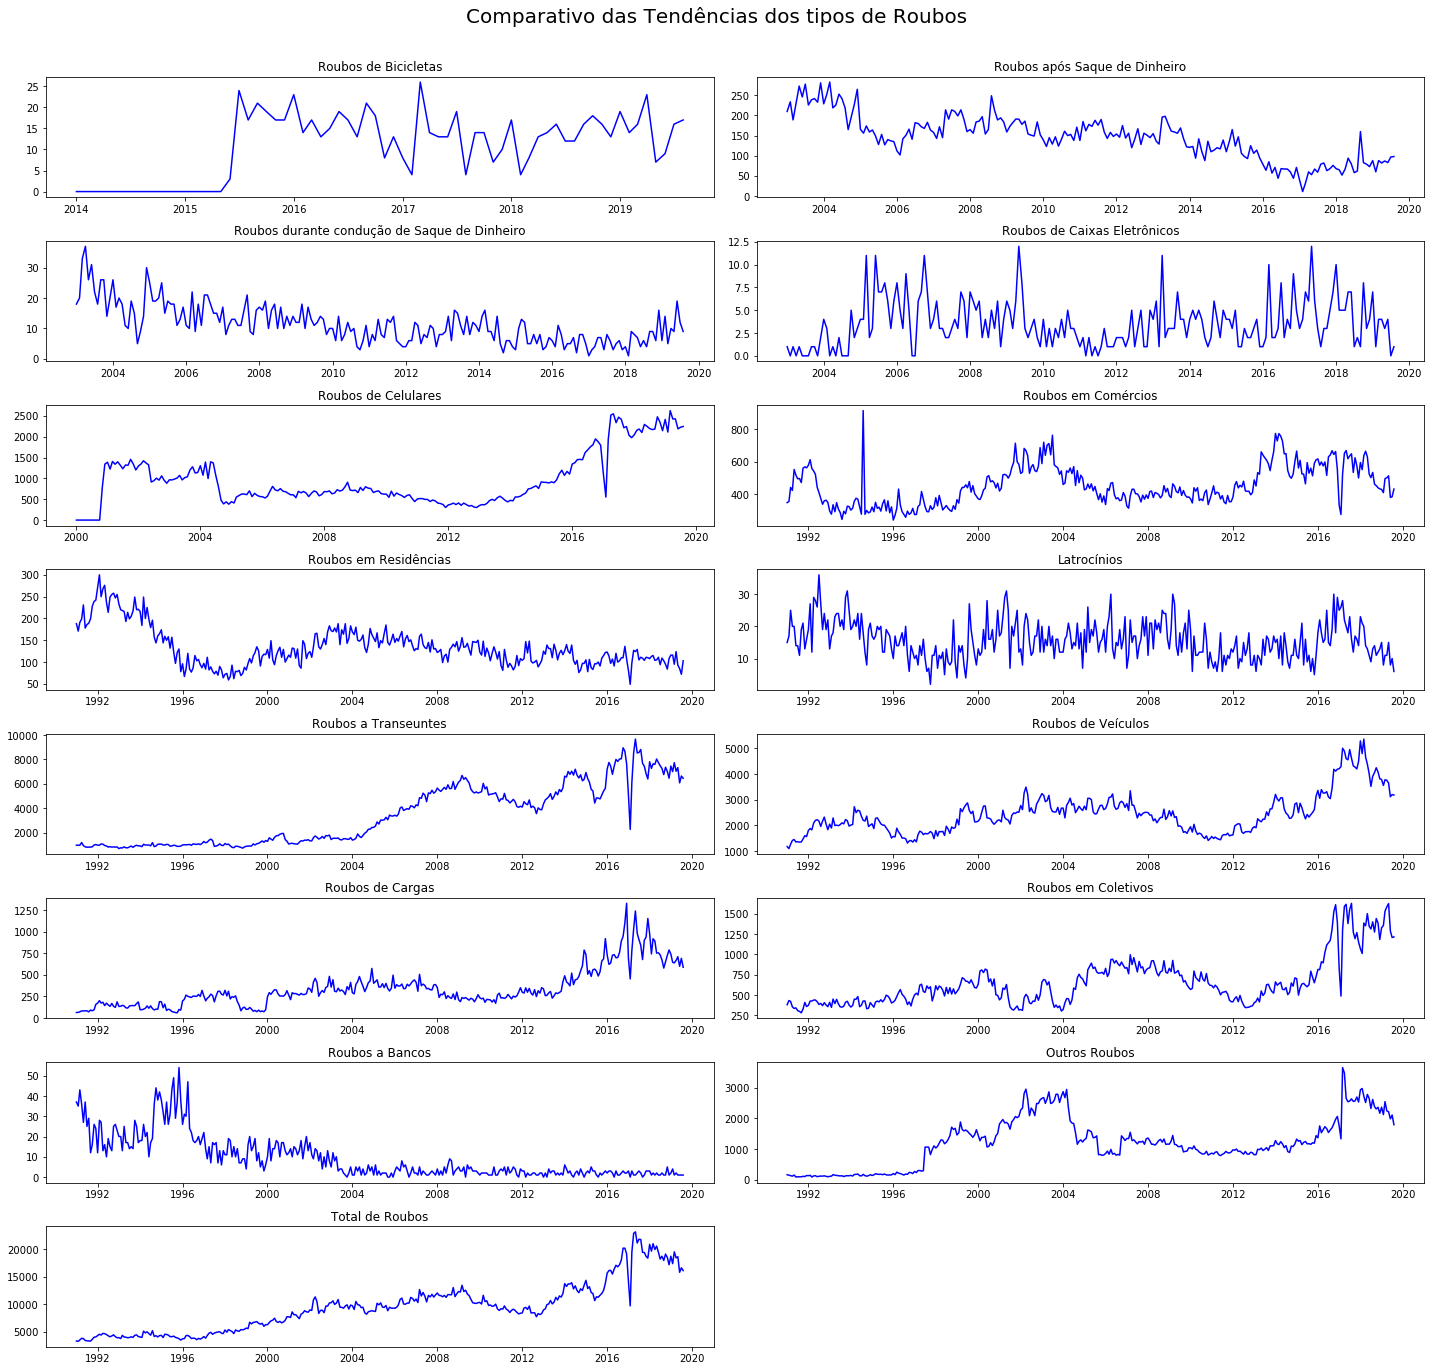

In [16]:
fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(20, 20))
fig.delaxes(ax[7,1])

# Roubos de bicicletas
ax[0, 0].plot('roubo_bicicleta', data=df_sel, color="blue")
ax[0, 0].set_title('Roubos de Bicicletas')

# Roubos após saque
ax[0, 1].plot('roubo_apos_saque', data=df_sel, color="blue")
ax[0, 1].set_title('Roubos após Saque de Dinheiro')

# Roubos durante condução de Saque de Dinheiro
ax[1, 0].plot('roubo_conducao_saque', data=df_sel, color="blue")
ax[1, 0].set_title('Roubos durante condução de Saque de Dinheiro')

# Roubos de Caixas Eletrônicos
ax[1, 1].plot('roubo_cx_eletronico', data=df_sel, color="blue")
ax[1, 1].set_title('Roubos de Caixas Eletrônicos')

# Roubos de Celulares
ax[2, 0].plot('roubo_celular', data=df_sel, color="blue")
ax[2, 0].set_title('Roubos de Celulares')

# Roubos em Comércios
ax[2, 1].plot('roubo_comercio', data=df_sel, color="blue")
ax[2, 1].set_title('Roubos em Comércios')

# Roubos em Residências
ax[3, 0].plot('roubo_residencia', data=df_sel, color="blue")
ax[3, 0].set_title('Roubos em Residências')

# Latrocínios
ax[3, 1].plot('latrocinio', data=df_sel, color="blue")
ax[3, 1].set_title('Latrocínios')

# Roubos a Transeuntes
ax[4, 0].plot('roubo_transeunte', data=df_sel, color="blue")
ax[4, 0].set_title('Roubos a Transeuntes')

# Roubos de Veículos
ax[4, 1].plot('roubo_veiculo', data=df_sel, color="blue")
ax[4, 1].set_title('Roubos de Veículos')

# Roubos de Cargas
ax[5, 0].plot('roubo_carga', data=df_sel, color="blue")
ax[5, 0].set_title('Roubos de Cargas')

# Roubos em Coletivos
ax[5, 1].plot('roubo_em_coletivo', data=df_sel, color="blue")
ax[5, 1].set_title('Roubos em Coletivos')

# Roubos a Bancos
ax[6, 0].plot('roubo_banco', data=df_sel, color="blue")
ax[6, 0].set_title('Roubos a Bancos')

# Outros Roubos
ax[6, 1].plot('outros_roubos', data=df_sel, color="blue")
ax[6, 1].set_title('Outros Roubos')

# Total de Roubos
ax[7, 0].plot('total_roubos', data=df_sel, color="blue")
ax[7, 0].set_title('Total de Roubos')

fig.suptitle("Comparativo das Tendências dos tipos de Roubos", fontsize=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('roubos.png')

Através do comparativo entre os diferentes tipos de roubos, podemos perceber que:
- A quantidade da maioria dos tipos de roubos vem aumentando nos últimos anos, e isso também é visto no gráfico **Total de Roubos**;
- O tipo de roubo mais comum são os **Roubos a Transeuntes**.

**Treemap para os roubos**

Iremos fazer um treemap para os roubos e assim analisar qual tipo de roubo é o mais comum. Para isso, precisamos transformar cada atributo de roubo em uma porcentagem, com exceção do atributo `latrocinio` que já está incluso em `outros_roubos` conforme explicado no dicionário de atributos. Assim temos:

In [17]:
roubo_porcentagens = [round((df_sel.roubo_bicicleta.sum() / df_sel.total_roubos.sum()) * 100, 2), round((df_sel.roubo_apos_saque.sum() / df_sel.total_roubos.sum()) * 100, 2), 
               round((df_sel.roubo_conducao_saque.sum() / df_sel.total_roubos.sum()) * 100, 2), round((df_sel.roubo_cx_eletronico.sum() / df_sel.total_roubos.sum()) * 100, 2),
               round((df_sel.roubo_celular.sum() / df_sel.total_roubos.sum()) * 100, 2), round((df_sel.roubo_comercio.sum() / df_sel.total_roubos.sum()) * 100, 2),
               round((df_sel.roubo_residencia.sum() / df_sel.total_roubos.sum()) * 100, 2), round((df_sel.roubo_transeunte.sum() / df_sel.total_roubos.sum()) * 100, 2),
               round((df_sel.roubo_veiculo.sum() / df_sel.total_roubos.sum()) * 100, 2), round((df_sel.roubo_carga.sum() / df_sel.total_roubos.sum()) * 100, 2),
               round((df_sel.roubo_em_coletivo.sum() / df_sel.total_roubos.sum()) * 100, 2), round((df_sel.roubo_banco.sum() / df_sel.total_roubos.sum()) * 100, 2),
               round((df_sel.outros_roubos.sum() / df_sel.total_roubos.sum()) * 100, 2)]

print("Porcentagem de cada tipo de roubo:")
print(roubo_porcentagens)

Porcentagem de cada tipo de roubo:
[0.02, 0.9, 0.07, 0.02, 6.97, 4.83, 1.41, 36.26, 25.97, 3.61, 6.99, 0.1, 12.85]


Para uma melhor visualização do treemap, vamos juntar os valores menores que 5% junto com a porcentagem do atributo `outros_roubos`:

In [18]:
join_outros_roubos = roubo_porcentagens[0] + roubo_porcentagens[1] + roubo_porcentagens[2] + roubo_porcentagens[3] + roubo_porcentagens[5] + roubo_porcentagens[6] + roubo_porcentagens[9] + roubo_porcentagens[11] + roubo_porcentagens[12]

Agora vamos definir os parâmetros para o treemap:

In [19]:
# Tamanho de cada retângulo do treemap
roubo_sizes = [roubo_porcentagens[4], roubo_porcentagens[7], roubo_porcentagens[8], roubo_porcentagens[10], join_outros_roubos]

# Rótulo de cada retângulo
roubo_labels = ['Roubos de Celulares: 6.97%', 'Roubos a Transeuntes: 36.26%', 'Roubos de Veículos: 25.97%', 'Roubos em Coletivos: 6.99%', 'Outros Roubos: 23.81%']

# Criando a paleta de cores para o treemap
cmap = matplotlib.cm.Pastel1
mini = min(roubo_sizes)
maxi = max(roubo_sizes)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
roubo_colors = [cmap(norm(i)) for i in roubo_sizes]

Fazendo o treemap:

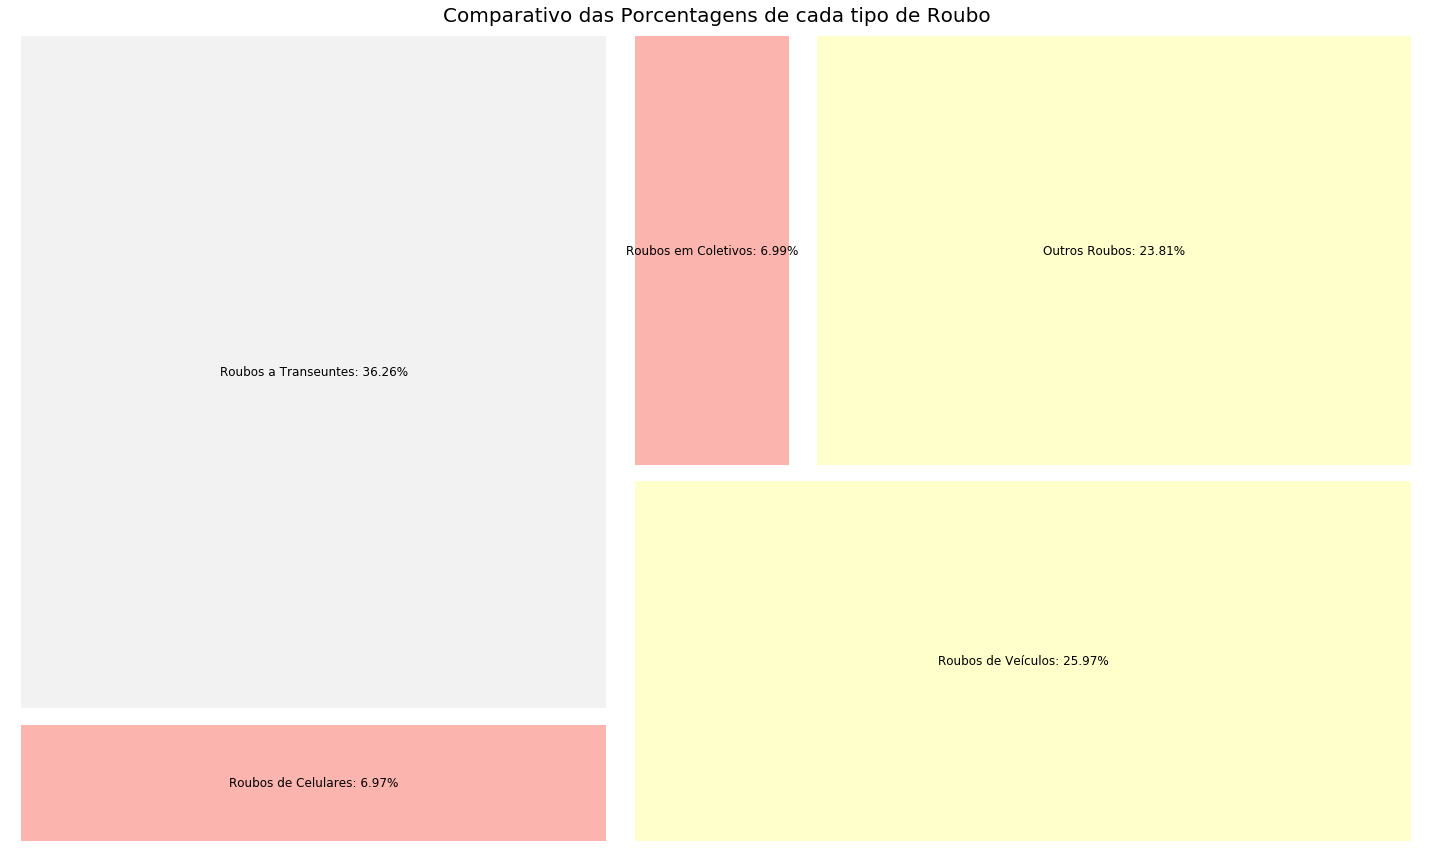

In [31]:
plt.figure(figsize=(20, 12))
squarify.plot(sizes=roubo_sizes, label=roubo_labels, color=roubo_colors, pad=True, text_kwargs={'fontsize': 12})

plt.title('Comparativo das Porcentagens de cada tipo de Roubo', fontsize=20)
plt.axis('off');
plt.tight_layout();
plt.savefig("fig_roubos.png")

Analisando o Comparativo das Porcentagens de cada tipo de Roubo, podemos perceber que ocorrem mais **Roubos a Transeuntes**, seguido de **Roubos de Veículos**. Um outro fato a se notar é que apesar dos **Roubos de Celulares** começaram a ser contabilizados no ano de 2000 (Ver: **Comparativo das Tendências dos tipos de Roubos**), esse tipo de roubo já representa uma **parcela considerável do total de roubos**.

**Tendência dos Furtos**

Agora será analisada se há alguma tendência nos diferentes tipos de furtos.

Fazendo os gráficos:

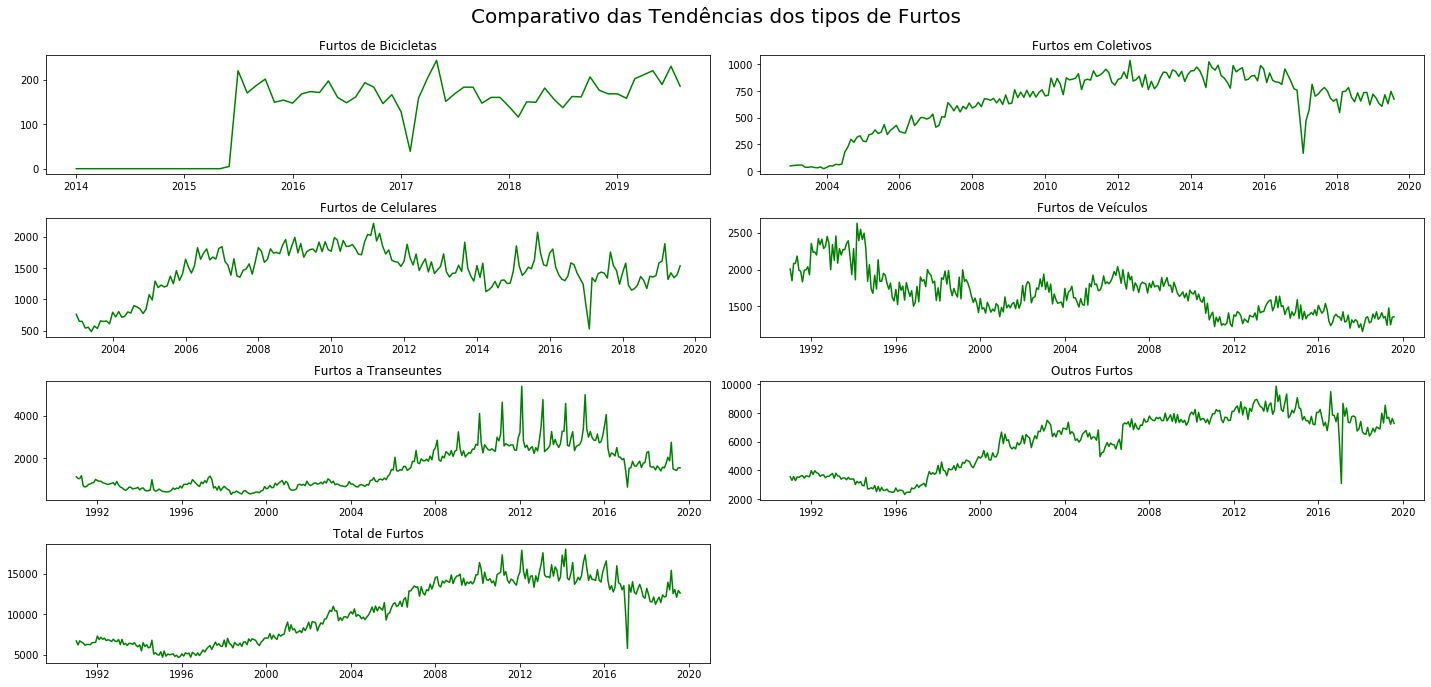

In [21]:
figf, axf = plt.subplots(nrows = 4, ncols = 2, figsize=(20,10))
figf.delaxes(axf[3,1])

# Furtos de Bicicletas
axf[0, 0].plot('furto_bicicleta', data=df_sel, color='green');
axf[0, 0].set_title('Furtos de Bicicletas');

# Furtos em Coletivos
axf[0, 1].plot('furto_coletivo', data=df_sel, color='green');
axf[0, 1].set_title('Furtos em Coletivos');

# Furtos de Celulares
axf[1, 0].plot('furto_celular', data=df_sel, color='green');
axf[1, 0].set_title('Furtos de Celulares');

# Furtos de Veículos
axf[1, 1].plot('furto_veiculos', data=df_sel, color='green');
axf[1, 1].set_title('Furtos de Veículos');

# Furtos a Transeuntes
axf[2, 0].plot('furto_transeunte', data=df_sel, color='green');
axf[2, 0].set_title('Furtos a Transeuntes');

# Outros Furtos
axf[2, 1].plot('outros_furtos', data=df_sel, color='green');
axf[2, 1].set_title('Outros Furtos');

# Total de Furtos
axf[3, 0].plot('total_furtos', data=df_sel, color='green');
axf[3, 0].set_title('Total de Furtos')

figf.suptitle('Comparativo das Tendências dos tipos de Furtos', fontsize=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Como podemos perceber no **Comparativo das Tendências dos tipos de Furtos**, todos os tipos de furtos cresceram nos últimos anos, com exceção dos **Furtos de Veículos**. Essa tendência pode ser vista também no **Total de Furtos**.

**Treemap para os furtos**

Para o treemap para os furtos, precisamos transformar em porcentagem a quantidade de cada tipo de furto em relação ao total de furtos (`total_furtos`). Assim temos:

In [22]:
furto_porcentagens = [round((df_sel.furto_veiculos.sum() / df_sel.total_furtos.sum()) * 100, 2), round((df_sel.furto_transeunte.sum() / df_sel.total_furtos.sum()) * 100, 2), 
                     round((df_sel.furto_coletivo.sum() / df_sel.total_furtos.sum()) * 100, 2), round((df_sel.furto_celular.sum() / df_sel.total_furtos.sum()) * 100, 2), 
                     round((df_sel.furto_bicicleta.sum() / df_sel.total_furtos.sum()) * 100, 2), round((df_sel.outros_furtos.sum() / df_sel.total_furtos.sum()) * 100, 2)]

print("Porcentagem de cada tipo de furto:")
print(furto_porcentagens)

Porcentagem de cada tipo de furto:
[16.05, 14.56, 3.62, 8.08, 0.24, 57.45]


Definindo os parâmetros para o treemap:

> Para o parâmetro `sizes` (tamanho de cada retângulo), iremos utilizar diretamente as porcentagens de cada tipo de furto (`furto_porcentagens`).
>

In [23]:
# Rótulo de cada retângulo
furto_labels = ['Furtos de Veículos: 16.05%', 'Furtos a Transeuntes: 14.56%', 'Furtos em Coletivos: 3.62%', 'Furtos de Celulares: 8.08%', 'Furtos de Bicicletas: 0.24%', 
                'Outros Furtos: 57.45%']

# Criando a paleta de cores para o treemap
cmapf = matplotlib.cm.Pastel1
minf = min(furto_porcentagens)
maxf = max(furto_porcentagens)
normf = matplotlib.colors.Normalize(vmin = minf, vmax = maxf)
furto_colors = [cmapf(normf(i)) for i in furto_porcentagens]

Fazendo o treemap:

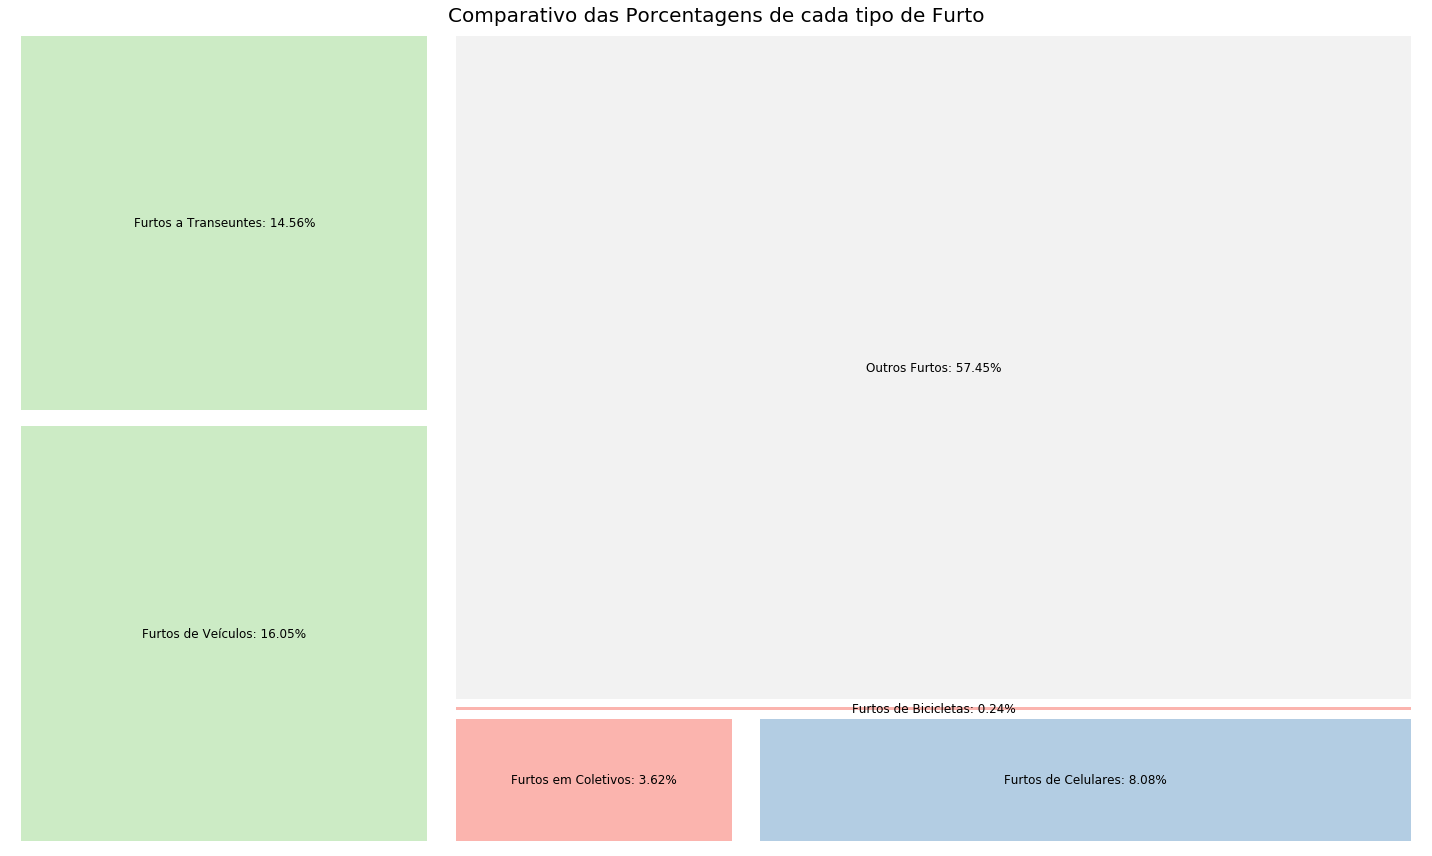

In [30]:
plt.figure(figsize=(20, 12))
squarify.plot(sizes=furto_porcentagens, label=furto_labels, color = furto_colors, pad=True, text_kwargs={'fontsize': 12})

plt.title('Comparativo das Porcentagens de cada tipo de Furto', fontsize=20)
plt.axis('off');
plt.tight_layout()

Analisando o **Comparativo das Porcentagens de cada tipo de Furto**, podemos concluir que:
- **Outros Furtos** é o tipo mais comum de furto ocorrido;
- Apesar dos **Furtos de Veículos** virem diminuindo (ver: **Comparativo das Tendências dos tipos de Furtos**), ainda representa uma grande parcela dos furtos ocorridos no Rio de Janeiro;
- Apesar dos **Furtos de celulares** começarem a ser contabilizados apenas em 2003 (**Comparativo das Tendências dos tipos de Furtos**), esse tipo de furto já apresenta uma parcela considerável dos furtos ocorridos no Rio de Janeiro.

### **Crimes contra a vida**

Antes de iniciar a análise de crimes contra a vida, algumas considerações serão feitas:
> - Homicídio culposo (`hom_culposo`): leva apenas em conta as mortes no trânsito; e é provocado em razão de falta de cuidado objetivo do agente, imprudência, imperícia ou negligência, ou seja, não há a intenção de matar (Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Homic%C3%ADdio#Homic%C3%ADdio_culposo)). Mesmo com essas condições, o Homicídio culposo será considerado **Crime contra a vida**.
> - Apesar do latrocínio (`latrocinio`) já ter sido considerado como **Roubos**, também será considerado como **Crime contra a vida**, pois é o ato de matar para roubar (Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Latroc%C3%ADnio)).
> - Serão considerados apenas os crimes que resultaram em morte.

Com isso, iremos fazer um gráfico de linha para cada tipo de Crime contra a vida, para então analisarmos as tendências desses tipos de crime no decorrer dos anos.

Fazendo os gráficos de linhas:

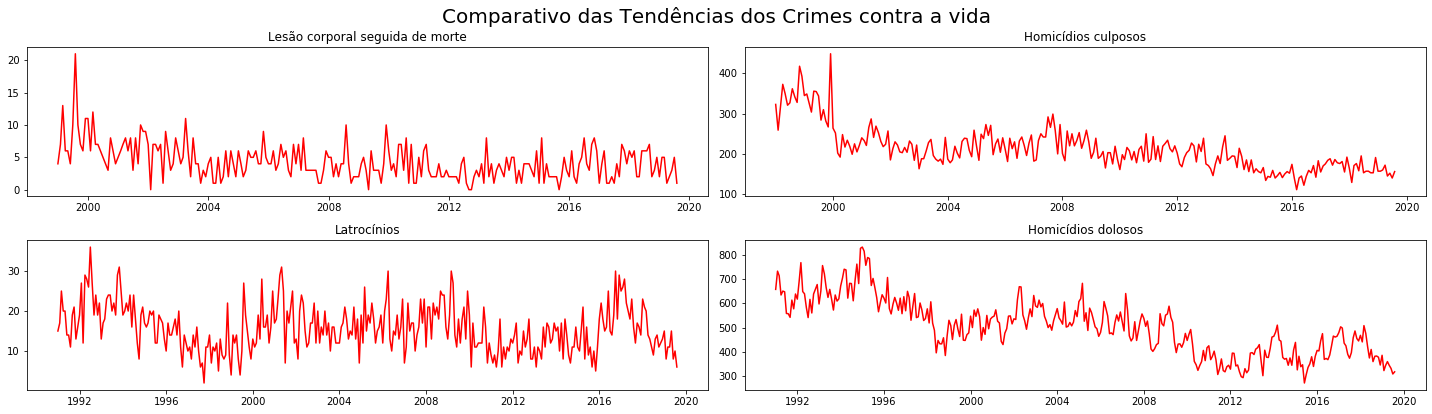

In [25]:
figm, axm = plt.subplots(nrows=2, ncols = 2, figsize = (20, 6))

# Lesão corporal seguida de morte
axm[0, 0].plot('lesao_corp_morte', data = df_sel, color='Red');
axm[0, 0].set_title('Lesão corporal seguida de morte');

# Homicídios culposos
axm[0, 1].plot('hom_culposo', data = df_sel, color='Red');
axm[0, 1].set_title('Homicídios culposos');

# Latrocínios
axm[1, 0].plot('latrocinio', data = df_sel, color='Red');
axm[1, 0].set_title('Latrocínios');

# Homicídios dolosos
axm[1, 1].plot('hom_doloso', data = df_sel, color='Red');
axm[1, 1].set_title('Homicídios dolosos');

figm.suptitle('Comparativo das Tendências dos Crimes contra a vida', fontsize=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Através do **Comparativo das Tendências dos Crimes contra a vida** podemos notar que todos os tipos de Crime contra a vida tenderam a diminuir no decorrer dos anos.

**Treemap para os Crimes contra a vida**

Para o treemap dos Crimes contra a vida, primeiro precisamos somar todos os tipos de crimes analisados em uma única varíavel. E depois calcular a porcentagem de cada tipo desse crime. Assim:

In [26]:
# Cálculo da variável soma de todos os crimes
soma_crimes = df_sel.lesao_corp_morte.sum() + df_sel.hom_culposo.sum() + df_sel.latrocinio.sum() + df_sel.hom_doloso.sum()

# Porcentagem de cada tipo de crime contra a vida
crime_porcentagens = [round((df_sel.lesao_corp_morte.sum() / soma_crimes) * 100, 2), round((df_sel.hom_culposo.sum() / soma_crimes) * 100, 2),
                      round((df_sel.latrocinio.sum() / soma_crimes) * 100, 2), round((df_sel.hom_doloso.sum() / soma_crimes) * 100, 2)]

print("Porcentagem de cada tipo de crime contra a vida:")
print(crime_porcentagens)

Porcentagem de cada tipo de crime contra a vida:
[0.46, 23.45, 2.29, 73.8]


Definindo os parâmetros para o treemap:

> Para o parâmetro `sizes` (tamanho de cada retângulo), iremos utilizar diretamente as porcentagens de cada tipo de crime (`crime_porcentagens`).
>

In [27]:
# Rótulos de cada tipo de crime
crime_labels = ['Lesão corporal seguida de morte: 0.46%', 'Homicídio culposo: 23.45%', 'Latrocínio: 2.29%', 'Homicídio doloso: 73.8%']

# Criando a paleta de cores para o treemap
cmapc = matplotlib.cm.Pastel1
minc = min(crime_porcentagens)
maxc = max(crime_porcentagens)
normc = matplotlib.colors.Normalize(vmin = minc, vmax = maxc)
crime_colors = [cmapc(norm(i)) for i in crime_porcentagens]

Fazendo o treemap:

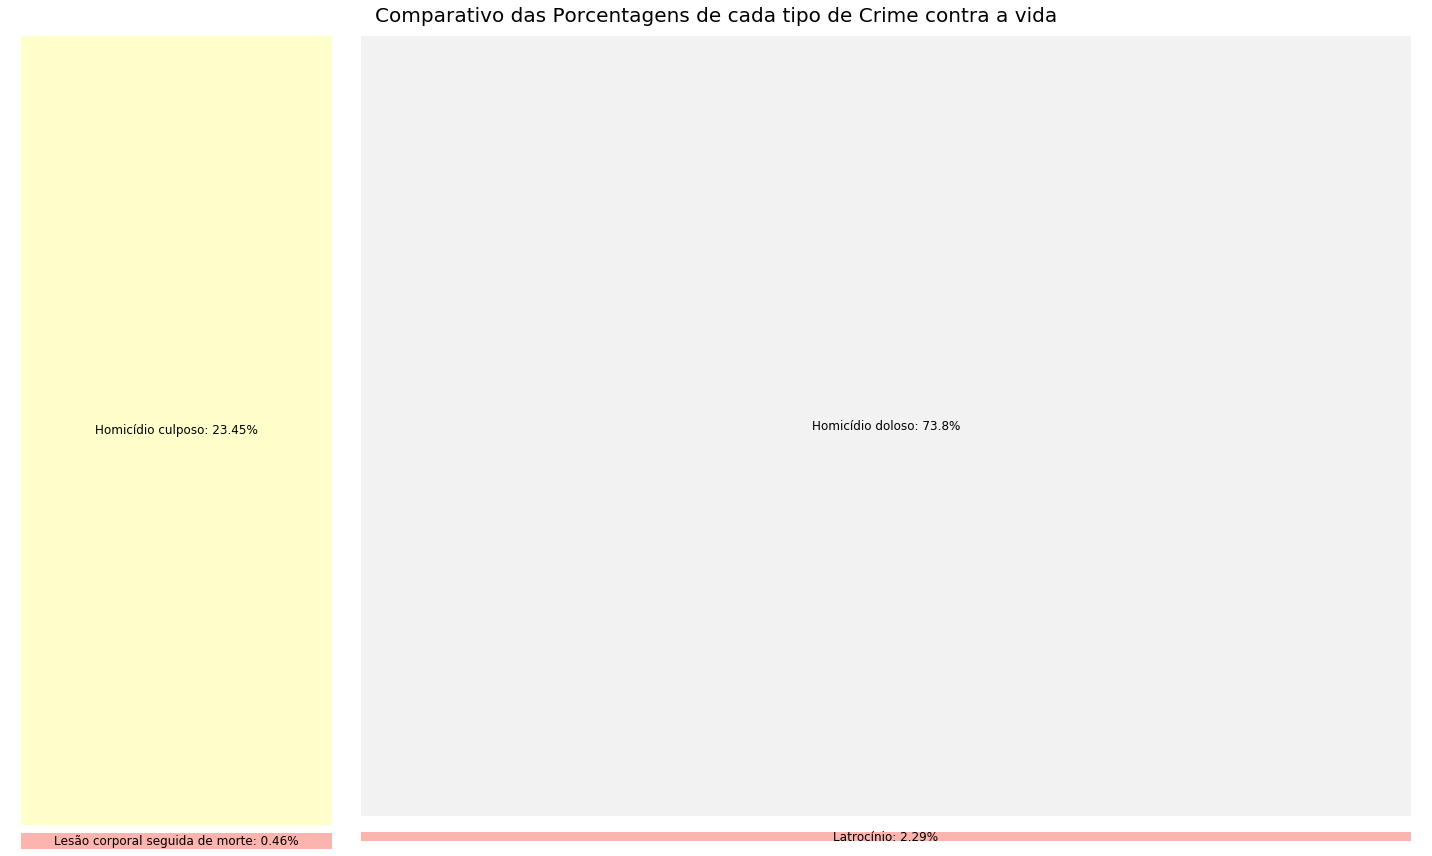

In [35]:
plt.figure(figsize=(20, 12))
squarify.plot(sizes=crime_porcentagens, label=crime_labels, color=crime_colors, pad=True, text_kwargs={'fontsize': 12});

plt.title('Comparativo das Porcentagens de cada tipo de Crime contra a vida', fontsize=20);
plt.axis('off');
plt.tight_layout()
plt.savefig("fig_crime_vida.png")

Percebe-se, pelo **Comparativo das Porcentagens de cada tipo de Crime contra a vida**, que o **Homicídio doloso** é o que apresenta a maior parcela entre os Crimes contra a vida no Rio de Janeiro, seguido pelo **Homicídio culposo**. E **Lesão corporal seguida de morte** e **Latrocínio** apresentam uma parcela bem pequena desses tipos de crimes.

## **Considerações finais**

Após a análise realizada dos dados sobre a violência no Rio de Janeiro, vimos que:
- **Roubos** e **Furtos** apresentaram crescimento nos últimos anos;
- Todos os tipos **Crimes contra a vida** analisados apresentaram diminuição nos últimos anos;
- Apesar de **Roubos** e **Furtos** de **Celulares** começarem a ter sido contabilizados apenas no ano 2000, já representa uma parcela considerável de ambos os delitos;
- **Roubos a Transeuntes** é o que apresenta maior parcela entre os tipos de Roubos analisados;
- Apesar de ter mostrado queda nos últimos **Furtos a Veículos** é o que representa maior parcela depois de **Outros Furtos**;
- **Homicídio doloso** representa mais de **70%** dos **Crimes contra a vida**, mesmo apresentando que da nos últimos anos.